In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [17]:
df=pd.read_csv("manufacturing_data.csv")

# Preprocessing & EDA

In [18]:
df.shape

(1197, 15)

In [19]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2/24/2015,Q4,Stitching Unit,Tuesday,Line-S1,0.6,22.53,708.0,5040,0,0.0,0,Minor Style Revision,42.0,0.268214
1,1/19/2015,Q3,Stitching Unit,Monday,Line-F3,0.8,11.41,1028.0,4380,50,0.0,0,No Style Change,31.0,0.800359
2,1/6/2015,Q1,Finishing & Quality,Tuesday,Line-C2,0.8,2.90,NaN,1440,0,0.0,0,No Style Change,8.0,0.681061
3,2/24/2015,Q4,Finishing & Quality,Tuesday,Line-S2,0.7,3.90,NaN,960,0,0.0,0,No Style Change,8.0,0.325000
4,1/4/2015,Q1,Finishing & Quality,Sunday,Line-C1,0.8,2.90,NaN,960,0,0.0,0,No Style Change,8.0,0.667604


In [20]:
df['styleChangeCount'].value_counts()

styleChangeCount
No Style Change         1050
Minor Style Revision     114
Major Design Shift        33
Name: count, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   recordDate           1197 non-null   object 
 1   fiscalQuarter        1197 non-null   object 
 2   productionDept       1197 non-null   object 
 3   dayOfWeek            1197 non-null   object 
 4   team                 1197 non-null   object 
 5   plannedEfficiency    1197 non-null   float64
 6   standardMinuteValue  1197 non-null   float64
 7   workInProgress       691 non-null    float64
 8   overtimeMinutes      1197 non-null   int64  
 9   performanceBonus     1197 non-null   int64  
 10  idleMinutes          1197 non-null   float64
 11  idleWorkers          1197 non-null   int64  
 12  styleChangeCount     1197 non-null   object 
 13  workerCount          1197 non-null   float64
 14  efficiencyScore      1197 non-null   float64
dtypes: float64(6), int64(3), object(6)
mem

In [22]:
df.describe()

,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,workerCount,efficiencyScore
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,89.000000,1.120437


In [23]:
df.isnull().sum()

recordDate               0
fiscalQuarter            0
productionDept           0
dayOfWeek                0
team                     0
plannedEfficiency        0
standardMinuteValue      0
workInProgress         506
overtimeMinutes          0
performanceBonus         0
idleMinutes              0
idleWorkers              0
styleChangeCount         0
workerCount              0
efficiencyScore          0
dtype: int64

### Handle missing values

In [24]:
# df['workInProgress'].fillna(df['workInProgress'].mean(), inplace=True)
# df[' keeps only those rows where 'workInProgress' is not null'] = df['workInProgress'].fillna(0)

df = df[df['workInProgress'].notnull()]
# df= df.dropna()

In [25]:
df.shape

(691, 15)

In [61]:
df

,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,3,0,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
1,2,0,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359
5,2,0,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980
8,3,0,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417
9,0,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2,0,4,11,0.70,22.52,1134.0,8460,50,0.0,0,2,57.0,0.750038
1185,1,0,3,9,0.80,26.16,1189.0,10620,75,0.0,0,2,59.0,0.850502
1187,1,0,2,1,0.60,30.48,869.0,6720,0,0.0,0,1,56.0,0.600529
1191,0,0,5,3,0.70,21.98,413.0,9720,40,0.0,0,2,58.0,0.700481


### Encoding

In [27]:
df['recordDate'] = pd.to_datetime(df['recordDate'], errors='coerce')

cat_cols = ['fiscalQuarter', 'productionDept', 'dayOfWeek', 'team','styleChangeCount']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [28]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2015-02-24,3,0,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
1,2015-01-19,2,0,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359
5,2015-02-16,2,0,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980
8,2015-01-24,3,0,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417
9,2015-03-05,0,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 1195
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   recordDate           691 non-null    datetime64[ns]
 1   fiscalQuarter        691 non-null    int64         
 2   productionDept       691 non-null    int64         
 3   dayOfWeek            691 non-null    int64         
 4   team                 691 non-null    int64         
 5   plannedEfficiency    691 non-null    float64       
 6   standardMinuteValue  691 non-null    float64       
 7   workInProgress       691 non-null    float64       
 8   overtimeMinutes      691 non-null    int64         
 9   performanceBonus     691 non-null    int64         
 10  idleMinutes          691 non-null    float64       
 11  idleWorkers          691 non-null    int64         
 12  styleChangeCount     691 non-null    int64         
 13  workerCount          691 non-null    fl

In [30]:
df.describe()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
count,691,691.000000,691.0,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,2015-02-04 07:57:13.285093888,1.386397,0.0,2.542692,5.509407,0.723980,23.245412,1190.465991,6508.205499,44.483357,1.264834,0.639653,1.739508,52.445731,0.722013
min,2015-01-01 00:00:00,0.000000,0.0,0.000000,0.000000,0.070000,10.050000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.233705
25%,2015-01-18 00:00:00,0.000000,0.0,1.000000,3.000000,0.700000,18.790000,774.500000,4560.000000,30.000000,0.000000,0.000000,2.000000,52.000000,0.661470
50%,2015-02-04 00:00:00,1.000000,0.0,3.000000,5.000000,0.750000,22.520000,1039.000000,6840.000000,45.000000,0.000000,0.000000,2.000000,57.000000,0.750608
75%,2015-02-23 00:00:00,2.000000,0.0,4.000000,8.000000,0.800000,28.080000,1252.500000,7200.000000,60.000000,0.000000,0.000000,2.000000,58.000000,0.800402
max,2015-03-11 00:00:00,4.000000,0.0,5.000000,11.000000,0.800000,54.560000,23122.000000,25920.000000,138.000000,300.000000,45.000000,2.000000,89.000000,1.100484
std,NaN,1.206163,0.0,1.713328,3.431881,0.102006,6.976497,1837.455001,2864.505604,27.596591,16.712923,4.283652,0.537185,9.417353,0.154784


In [31]:
# Numerical feature 
num_cols = ['plannedEfficiency', 'standardMinuteValue', 'workInProgress', 
            'overtimeMinutes', 'performanceBonus', 'idleMinutes', 
            'idleWorkers', 'workerCount', 'efficiencyScore']

## Check Outlier in each feature

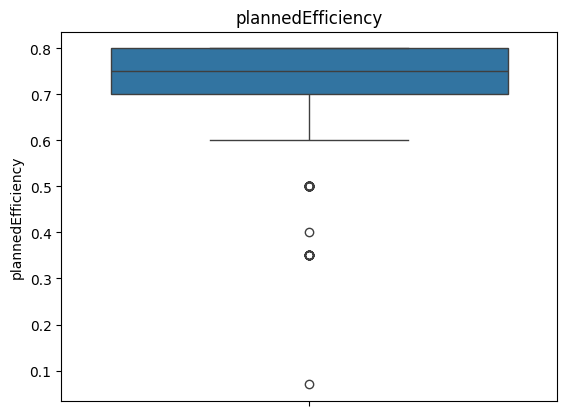

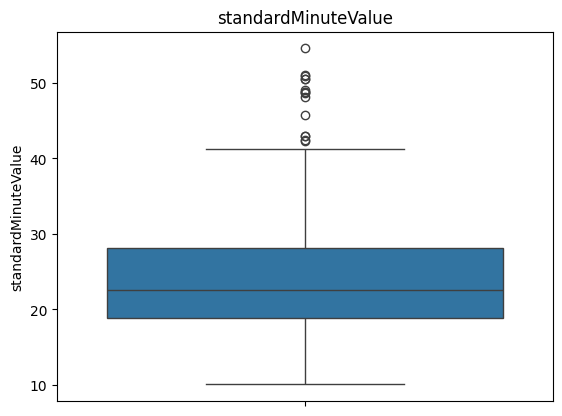

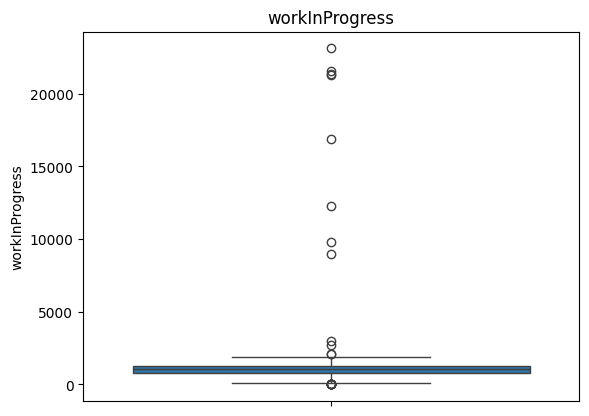

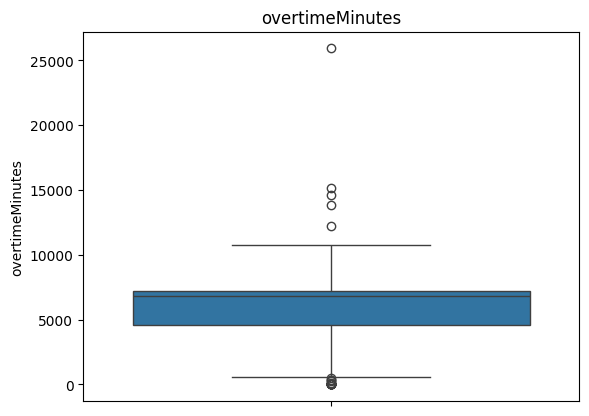

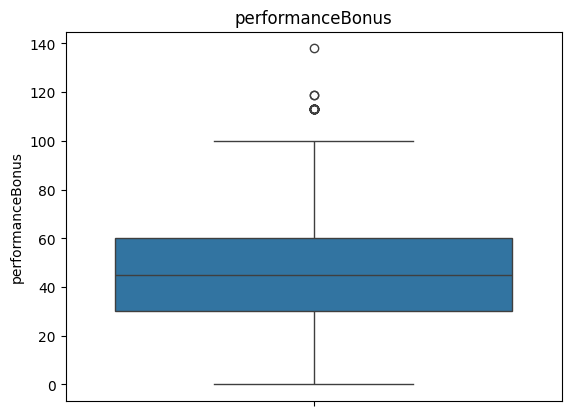

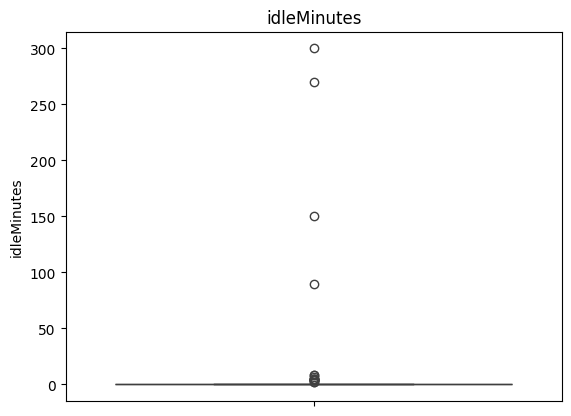

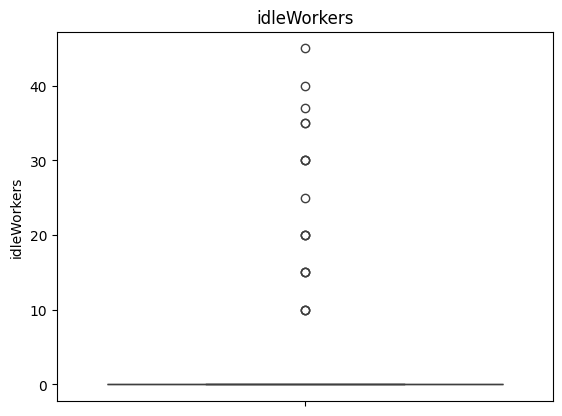

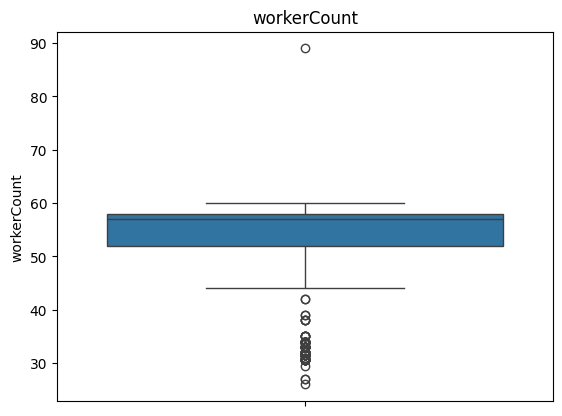

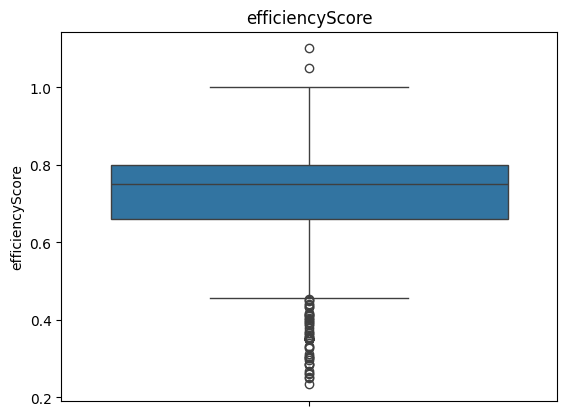

In [32]:
for col in num_cols:
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

## Check Linear Relationships between features

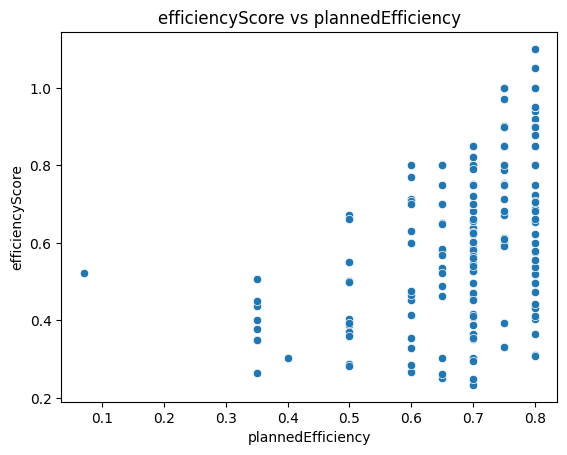

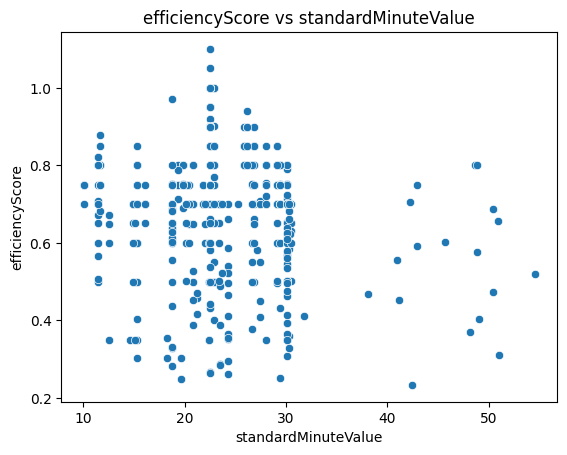

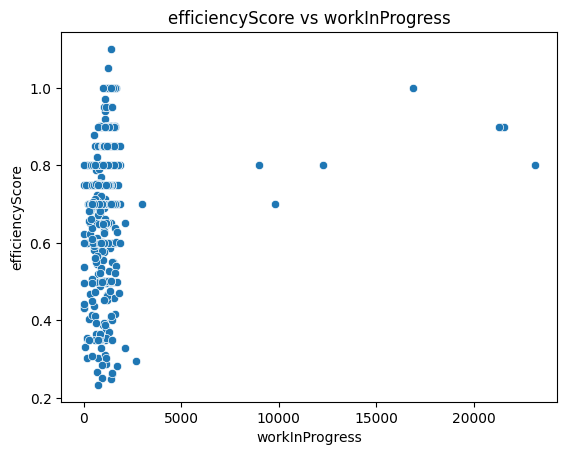

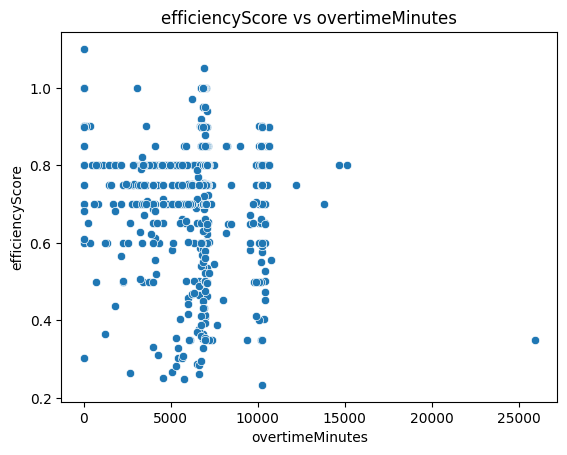

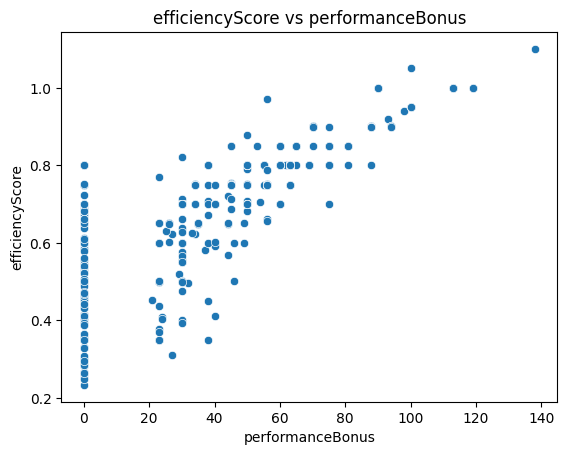

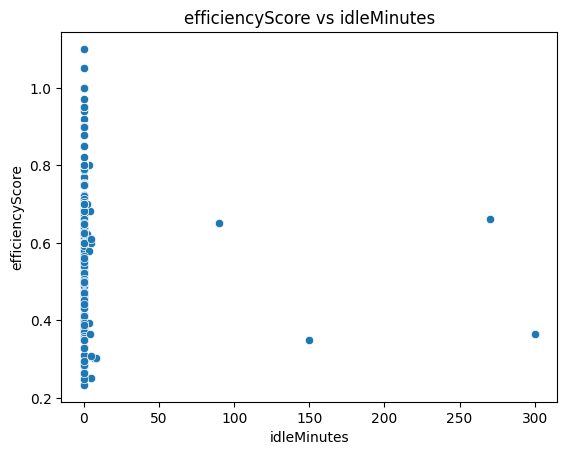

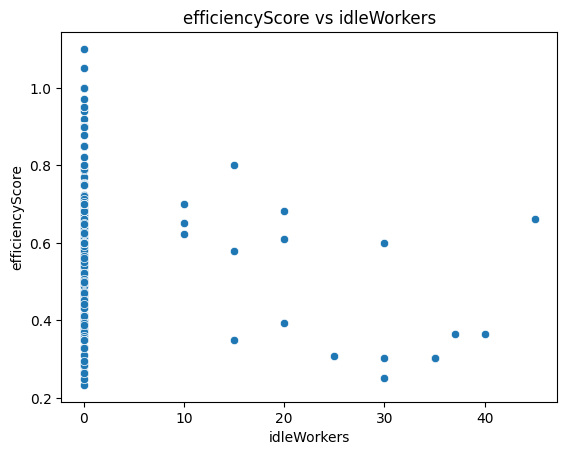

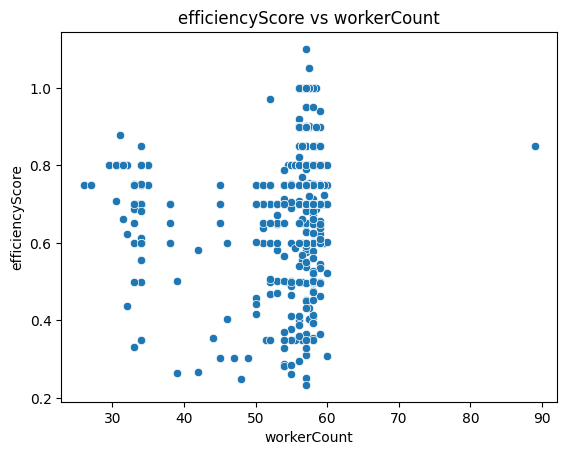

In [33]:
for col in num_cols:
    if col != 'efficiencyScore':
        sns.scatterplot(x=df[col], y=df['efficiencyScore'])
        plt.title(f'efficiencyScore vs {col}')
        plt.show()


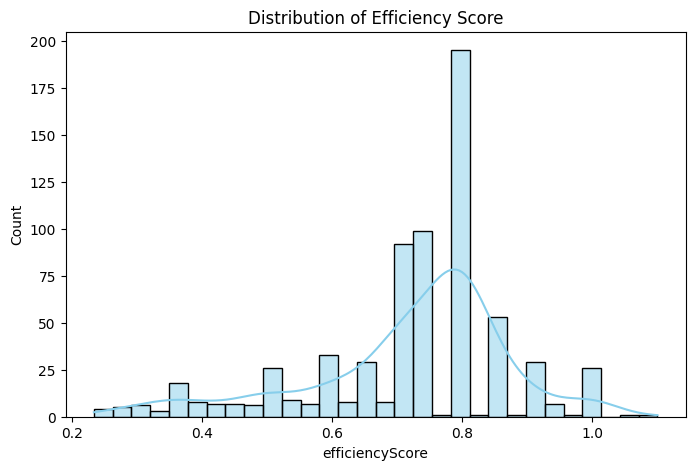

In [34]:
# distribution
plt.figure(figsize=(8,5))
sns.histplot(df['efficiencyScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Efficiency Score')
plt.show()

### Correlation Heatmap
The correlation heatmap helps visualize how features in the dataset relate to each other.  
it is useful for feature selection and detecting multicollinearity.


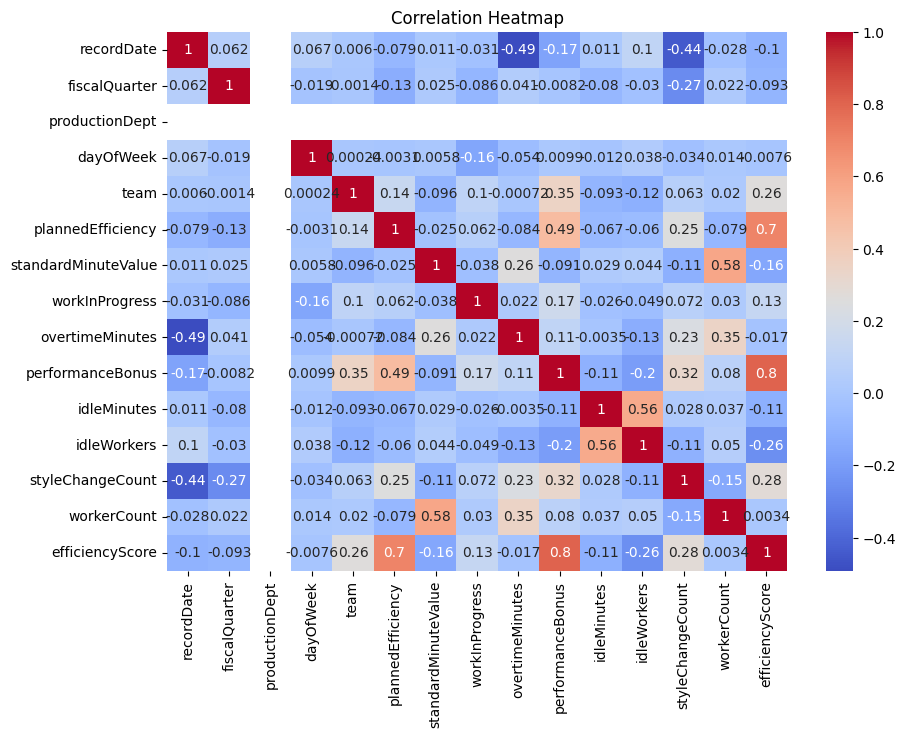

In [35]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* Most features show low correlation with the target — that means problem is complex

### Efficiency by Department

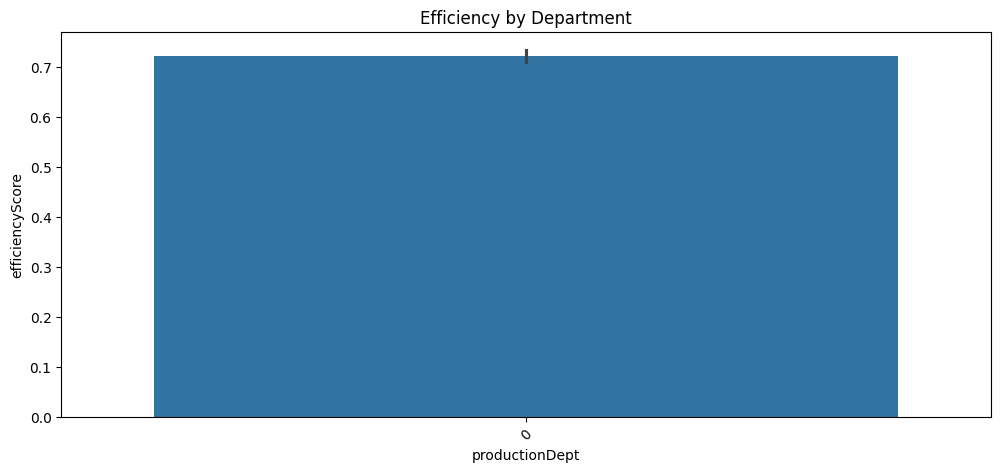

In [36]:
plt.figure(figsize=(12,5))
sns.barplot(x='productionDept', y='efficiencyScore', data=df)
plt.title('Efficiency by Department')
plt.xticks(rotation=45)
plt.show()

### Efficiency by Team

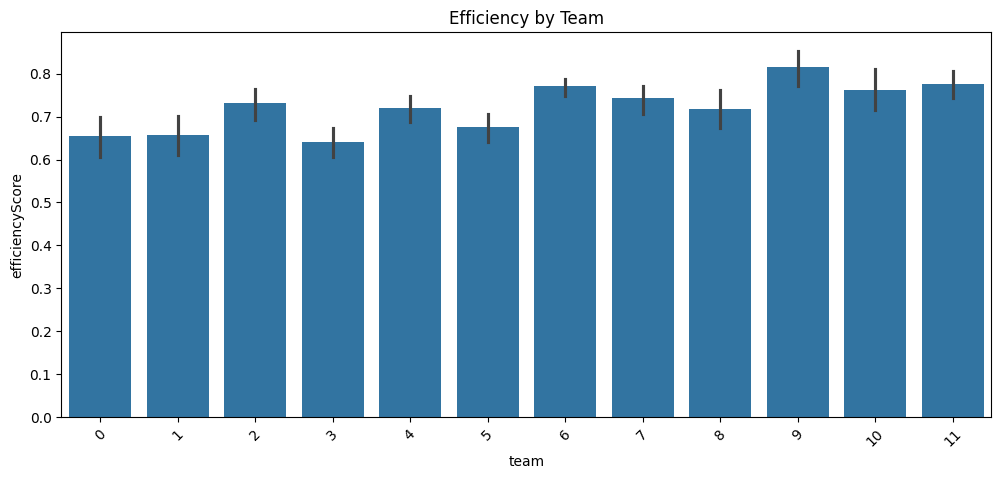

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='team', y='efficiencyScore', data=df)
plt.title('Efficiency by Team')
plt.xticks(rotation=45)
plt.show()

### Efficiency Trend over time
visualizes how the average efficiency changes over time.

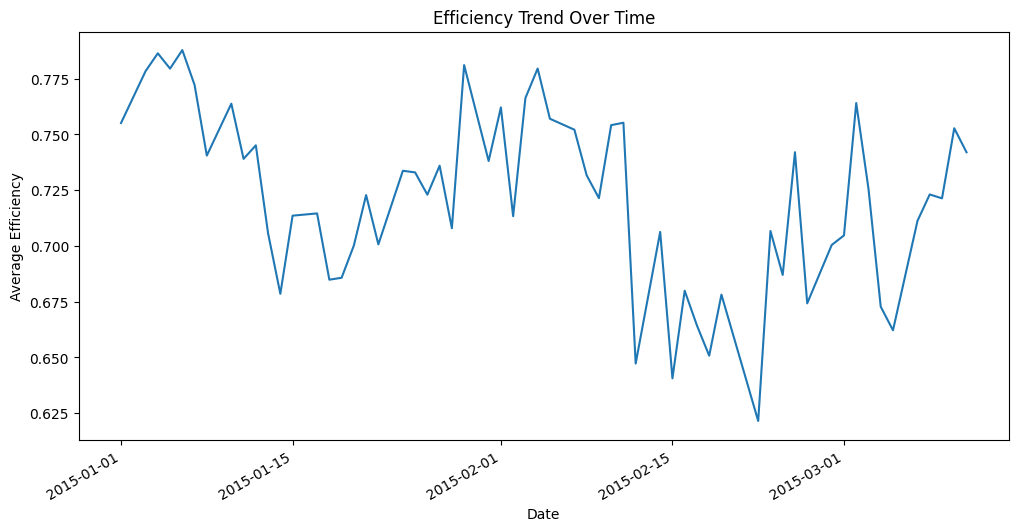

In [38]:
plt.figure(figsize=(12,6))
df.groupby('recordDate')['efficiencyScore'].mean().plot()
plt.title('Efficiency Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Efficiency')
plt.show()

In [39]:
df.head()

,recordDate,fiscalQuarter,productionDept,dayOfWeek,team,plannedEfficiency,standardMinuteValue,workInProgress,overtimeMinutes,performanceBonus,idleMinutes,idleWorkers,styleChangeCount,workerCount,efficiencyScore
0,2015-02-24,3,0,4,9,0.60,22.53,708.0,5040,0,0.0,0,1,42.0,0.268214
1,2015-01-19,2,0,0,4,0.80,11.41,1028.0,4380,50,0.0,0,2,31.0,0.800359
5,2015-02-16,2,0,0,3,0.80,30.10,461.0,0,0,0.0,0,2,59.0,0.800980
8,2015-01-24,3,0,1,0,0.65,22.52,1295.0,10170,26,0.0,0,2,56.5,0.650417
9,2015-03-05,0,0,3,7,0.75,18.79,1228.0,6240,45,0.0,0,2,52.0,0.750396


### Dropped the recordDate column as it is not directly useful for modeling

In [40]:
df = df.drop(['recordDate'], axis=1)

In [41]:
X = df.drop(['efficiencyScore'], axis=1)
y = df['efficiencyScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 #              Model Building, Selection, Training, and Evaluation 

#   1)- Linear Regression

#### i)- With Standardization

#### Feature Scaling
We scale features to have mean 0 and standard deviation 1 so that all features contribute equally to the model.

In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
lr_model_std = LinearRegression()
lr_model_std.fit(X_train_scaled, y_train)
y_pred_std = lr_model_std.predict(X_test_scaled)

print("Linear Regression with standardization:")
print("R² Score:", r2_score(y_test, y_pred_std))
print("MAE:", mean_absolute_error(y_test, y_pred_std))
print("MSE:", mean_squared_error(y_test, y_pred_std))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_std)))

Linear Regression with standardization:
R² Score: 0.710098710876079
MAE: 0.04682811091020939
MSE: 0.005132908176519021
RMSE: 0.07164431712647572


#### ii)- Without Standardization

In [44]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression without standardization")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression without standardization
R² Score: 0.7100987108760719
MAE: 0.04682811091020945
MSE: 0.0051329081765191485
RMSE: 0.0716443171264766


### Actual vs Predicted Values
compares the predicted values from the model with the actual values.

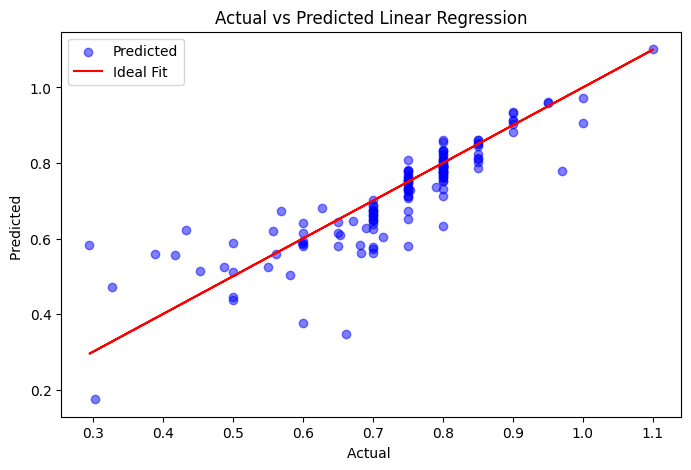

In [45]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=.5, label='Predicted')
plt.plot(y_test, y_test, color='red', label='Ideal Fit')
plt.title('Actual vs Predicted Linear Regression')
plt.xlabel('Actual ')
plt.ylabel('Predicted ')
plt.legend()
plt.show()

### Feature Importance
visualizes which features have the most impact on the target variable.

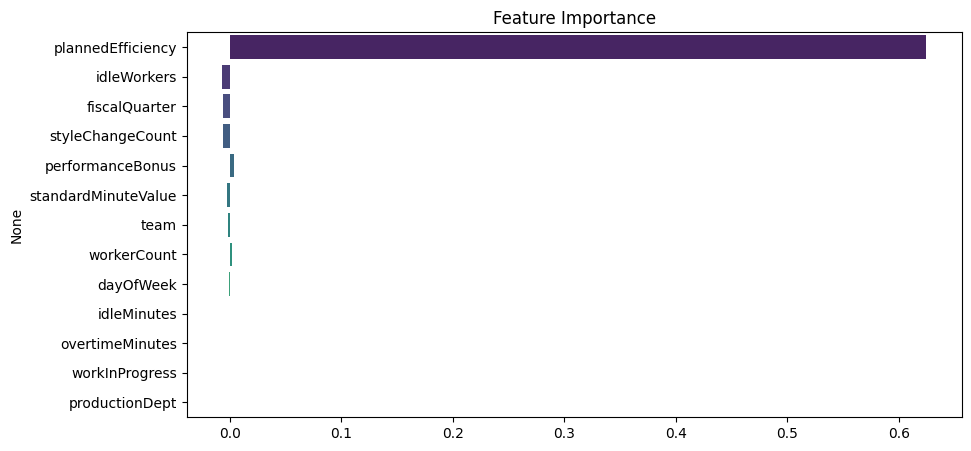

In [46]:
feat_imp = pd.Series(lr_model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index,hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance")
plt.show()


# 2)- Randomforest

In [47]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [48]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print(" Random Forest Evaluation :")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


 Random Forest Evaluation :
R² Score: 0.7791980287175793
MAE: 0.03566443193007193
MSE: 0.003909455688217351
RMSE: 0.06252564024636094


### Random Forest Hyperparameter Tuning using GridSearchCV
find the best combination of hyperparameters for the Random Forest Regressor, improving model performance.

In [49]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],          # number of trees
    'max_depth': [None, 5, 10, 20],          # maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # min samples to split an internal node
    'min_samples_leaf': [1, 2, 4],           # min samples at each leaf node
    'max_features': ['auto', 'sqrt', 'log2'] # number of features considered per split
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='r2',             # evaluate using R² score
    n_jobs=-1,                # use all CPU cores
    verbose=2                 # print progress
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best = best_rf.predict(X_test)

print("\nBest Model Performance:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Model Performance:
R² Score: 0.762525853237672
MAE: 0.03998647861092312
MSE: 0.004204648393637145
RMSE: 0.06484326020209923


C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\User

### Actual vs Predicted values
compares the predicted values from the model with the actual values

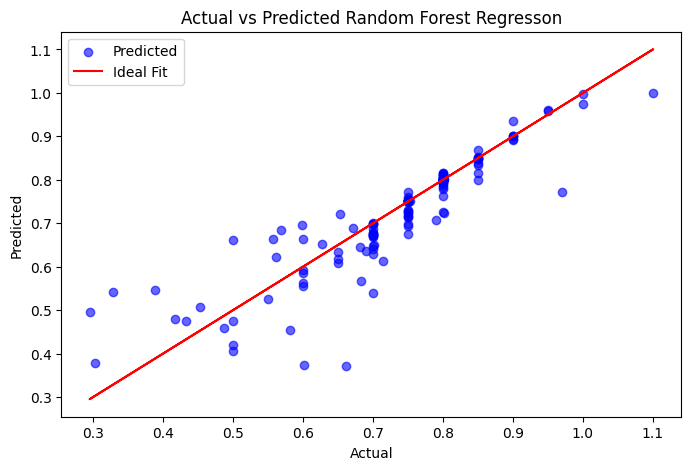

In [63]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6, label='Predicted')
plt.plot(y_test, y_test, color='red', label='Ideal Fit')
plt.title('Actual vs Predicted Random Forest Regresson')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


### Feature Importance
visualizes which features have the most impact on the target variable.

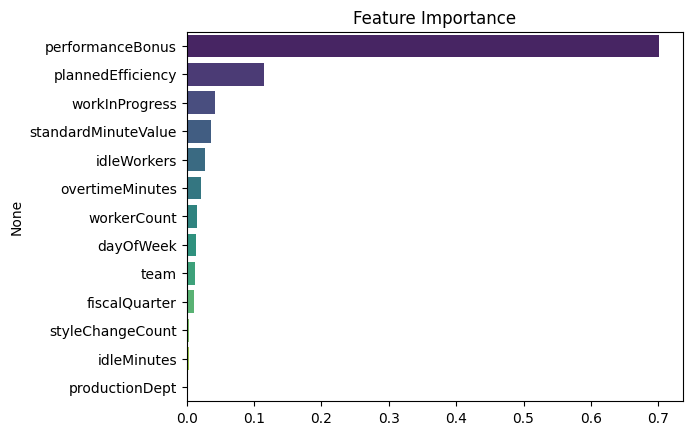

In [51]:
feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp.values, y=feat_imp.index, hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance")
plt.show()

### Residual Plot for Random Forest

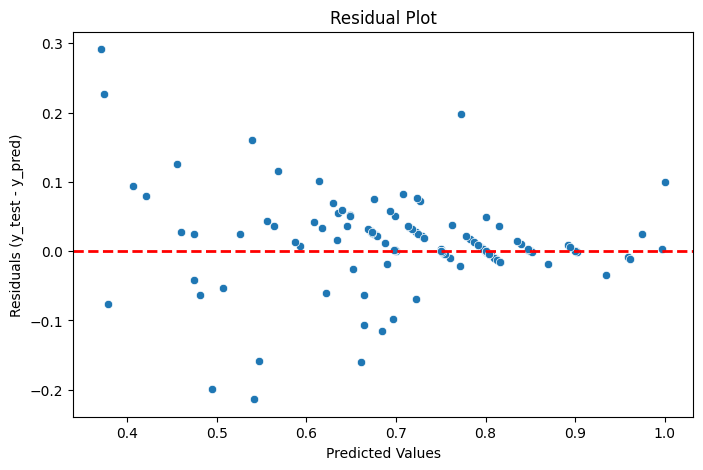

In [52]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


* The residuals are scattered randomly around the zero line, which indicates that the Random Forest model is capturing the underlying patterns well.
* There are no clear patterns or systematic trends, suggesting that the model is not biased

# 3)- XG Boost Regressor

In [53]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.04,
    max_depth=4,
    subsample=0.8,
    random_state=42,
    n_jobs=-1    
)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [54]:
print(" XGB:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


 XGB:
R² Score: 0.7610441074385914
MAE: 0.03641134281245213
MSE: 0.004230883755165226
RMSE: 0.06504524390887642


### XGBOOST Hyperparameter Tuning using RandomizedSearchCV

In [55]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],       # number of trees
    'max_depth': [3, 5, 7, 10, 15],             # maximum tree depth
    'learning_rate': [0.01, 0.05, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.6, 0.8, 1.0],               # fraction of data for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],        # fraction of features for each tree
    'gamma': [0, 0.1, 0.2, 0.5],                # minimum loss reduction
    'reg_alpha': [0, 0.01, 0.1, 1],             # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]                # L2 regularization
}

rand_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # number of random combinations to try
    scoring='r2',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rand_search.fit(X_train, y_train)

print("Best Parameters:", rand_search.best_params_)
best_xgb = rand_search.best_estimator_

y_pred = best_xgb.predict(X_test)

print("XGBoost Best Model Performance:")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
XGBoost Best Model Performance:
R² Score: 0.7248275254797161
MAE: 0.039954432038097794
MSE: 0.004872124055351749
RMSE: 0.06980060211310321


###  Actual vs Predicted Scatter Plot
compares the predicted values from the model with the actual values

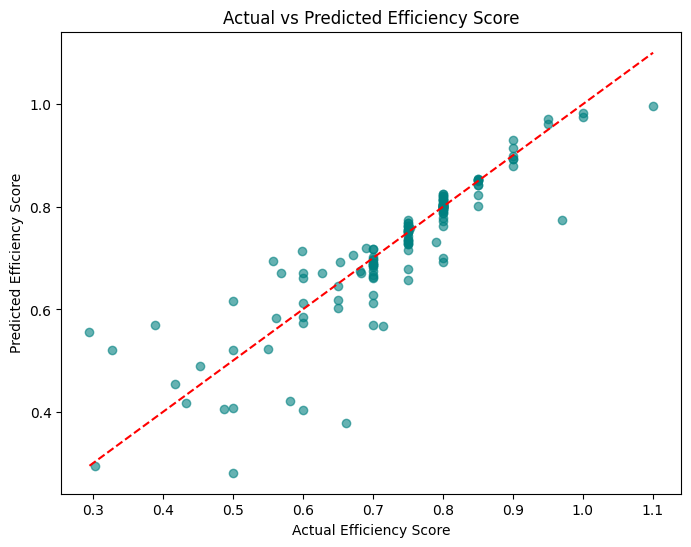

In [56]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Efficiency Score')
plt.ylabel('Predicted Efficiency Score')
plt.title('Actual vs Predicted Efficiency Score')
plt.show()


### XGBoost feature importance

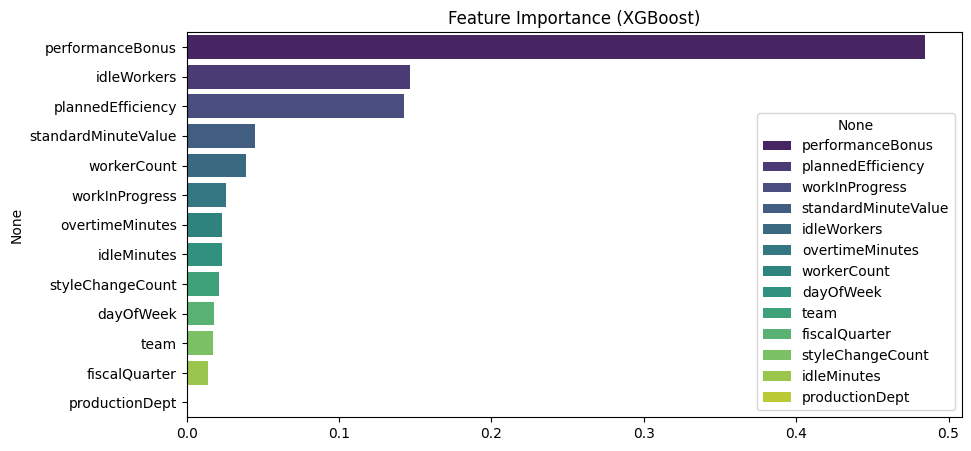

In [57]:
xgb_imp = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=xgb_imp.values, y=xgb_imp.index, hue=feat_imp.index, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()


### Residual Plot for XGboost

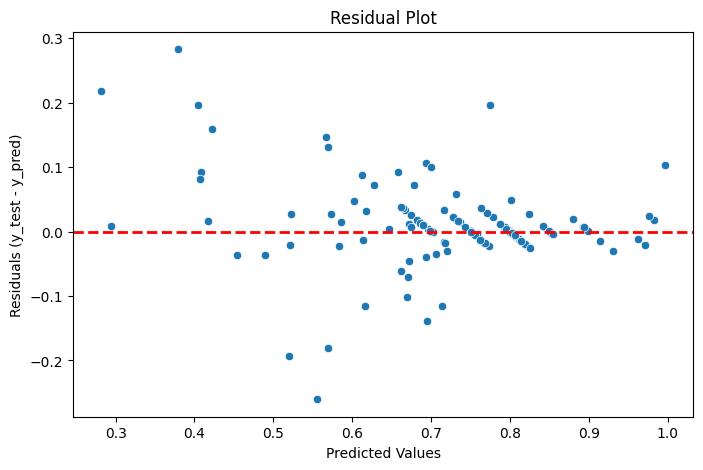

In [58]:
residuals = y_test - y_pred_xgb

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred_xgb, y=residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y_test - y_pred)")
plt.title("Residual Plot")
plt.show()


In [59]:
sample_point = [2, 2, 0, 4, 0.8, 11.41, 1028.0, 4380, 50, 0.0, 0, 2, 31.0]

# Convert to 2D array (1 sample, 13 features)
sample_array = np.array(sample_point).reshape(1, -1)

predicted_value_lr = lr_model.predict(sample_array)
print("Predicted target by LinearRegression:", predicted_value_lr[0])

predicted_value_rf = rf_model.predict(sample_array)
print("Predicted target by RandomForestRegressor:", predicted_value_rf[0])

predicted_value_xgb = xgb_model.predict(sample_array)
print("Predicted target by XGBoost:", predicted_value_xgb[0])

Predicted target by LinearRegression: 0.7982334296702663
Predicted target by RandomForestRegressor: 0.8043226300000006
Predicted target by XGBoost: 0.7990446


C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Vardan Kaushik\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
